In [1]:
import xgboost as xgb

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('Train_nyOWmfK.csv',encoding='latin1')
test=pd.read_csv('Test_bCtAN1w.csv',encoding='utf-8')

In [4]:
train.shape,test.shape

((87020, 26), (37717, 24))

In [5]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [6]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)

In [7]:
data.shape

(124737, 27)

In [8]:
data.apply(lambda x:sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [9]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(data[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

In [11]:
print(len(data['City'].unique()))
data.drop('City',axis=1,inplace=True)

724


In [12]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [16]:
data['Age']=data['DOB'].apply(lambda x:115-int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [18]:
data.drop('DOB',axis=1,inplace=True)

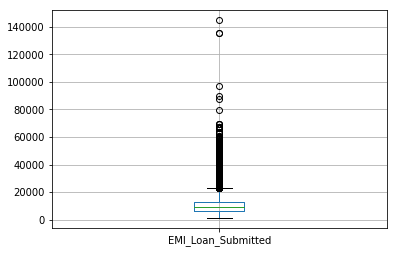

In [19]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [25]:
data['EMI_Loan_Submitted_Missing']=data['EMI_Loan_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

EMI_Loan_Submitted  EMI_Loan_Submitted_Missing
0                 NaN                           1
1             6762.90                           0
2                 NaN                           1
3                 NaN                           1
4                 NaN                           1
5             6978.92                           0
6                 NaN                           1
7                 NaN                           1
8            30824.65                           0
9            10883.38                           0

In [26]:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [27]:
len(data['Employer_Name'].value_counts())

57194

In [28]:
data.drop('Employer_Name',axis=1,inplace=True)

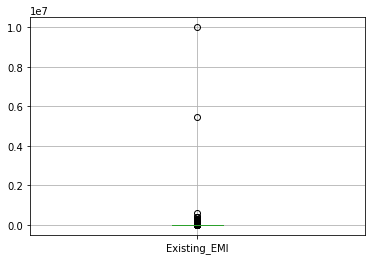

In [31]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [32]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [36]:
data['Existing_EMI'].fillna(0,inplace=True)

In [38]:
data['Interest_Rate_Missing']=data['Interest_Rate'].apply(lambda x:1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interest_Rate_Missing']].head(10))

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [39]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [40]:
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [41]:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [42]:
data['Loan_Amount_Submitted_Missing']=data['Loan_Amount_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing']=data['Loan_Tenure_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)

In [45]:
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [46]:
data.drop('LoggedIn',axis=1,inplace=True)

In [48]:
data.drop('Salary_Account',axis=1,inplace=True)

In [49]:
data['Processing_Fee_Missing']=data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
data.drop('Processing_Fee',axis=1,inplace=True)

In [50]:
data['Source']=data['Source'].apply(lambda x:'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [51]:
data.apply(lambda x:sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [53]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_to_encode=['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col]=le.fit_transform(data[col]) ###fit和transform合在一起

In [66]:
data=pd.get_dummies(data,columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [68]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [71]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)
train.shape,test.shape

((87020, 51), (37717, 50))